<a href="https://colab.research.google.com/github/champsleague/ComputerVision/blob/main/CV_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


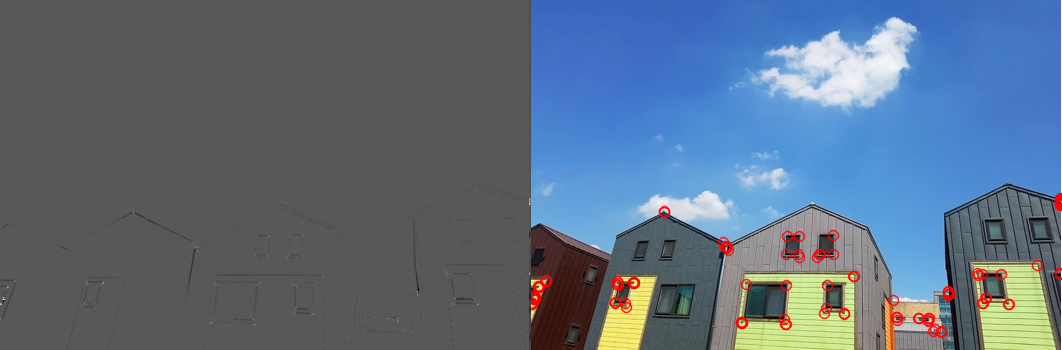

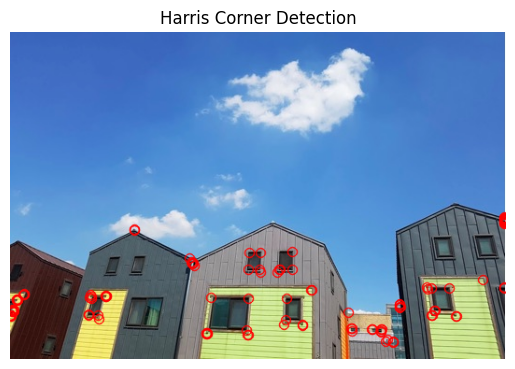

In [24]:
# [Lab 3-1] Harris Corner Detection

from google.colab import drive 
drive.mount('/content/gdrive')

# Mounted at /content/gdrive

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np 
import matplotlib.pylab as plt

img = cv.imread("house.jpg") 
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1.해리스 코너 검출  
corner = cv.cornerHarris (gray, 2, 3, 0.04)

# 2.변화량 결과의 최대값 10% 이상의 좌표 구하기 
coord = np.where(corner > 0.1 * corner.max())
coord= np.stack((coord[1], coord[0]), axis=-1)

# 3.코너 좌표에 그리미 그리기

for x, y in coord:
  cv.circle(img, (x,y), 5, (0,0,255), 1, cv.LINE_AA)

# 4.변화량을 영상으로 표현하기 위해서 0~255로 정규화 
corner_norm = cv.normalize(corner, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

# 화면에 출력 (OpenCV)
corner_norm = cv.cvtColor(corner_norm, cv.COLOR_GRAY2BGR)
merged = np.hstack ((corner_norm, img))

cv2_imshow(merged)
cv.waitKey() 
cv.destroyAllWindows()

# 화면에 출력 (matplot) 
b, g, r = cv.split(img)   # img 파일을 b,g,r로 분리
img_RGB = cv.merge([r, g, b])
plt.imshow(img_RGB) 
plt.axis("off")
plt.title("Harris Corner Detection")
plt.show()